**Brian Blaylock**  
**April 3, 2019**

# Explore Contingency Table and Fractions Skill Score
## Violin: All hours in a month

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable
#from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats
from BB_wx_calcs.binary_events import hit_rate, false_alarm_ratio, base_rate

from BB_HRRR.HRRR_paths import get_domains
#from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST

In [98]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [7,4]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.15
mpl.rcParams['figure.subplot.hspace'] = 0.15
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100


In [2]:
os.getcwd()

'/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/publications/GLM_HRRR'

In [3]:
domains = get_domains(add_states=['UT', 'CO', 'TX', 'FL'])

HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762
Utah Area in meters squared: 219973261639.39685
Colorado Area in meters squared: 269906899003.7569
Texas Area in meters squared: 688270731111.2987
Florida Area in meters squared: 149996892486.02234


In [8]:
## Specify the valid Datetime of interest
#DATE = datetime(2018, 5, 14, 22) # Mallard Fire
#DATE = datetime(2018, 7, 5, 23)  # Lake Christine 1
DATE = datetime(2018, 7, 6, 0)    # Lake Christine 2
#DATE = datetime(2018, 7, 17, 6)  # July Storm
#DATE = datetime(2018, 7, 27, 0)  # Missing GLM data

#DATE = datetime(2018, 7, 6, 0) # Test July 1, 2019

# Violin for the month: HR, FAR, and FSS

In [9]:
def get_contingency_table_by_hour(HOUR, MONTHS=range(5,11)):
    """
    Return a dictionary of all the data for the specified Hour from each month.
    
    Input:
        HOUR   - The hour of day, 0-23.
        MONTHS - Default is May-Oct, becuase that is what is avaialble right now.
    """
    data_dict = {}
    for DOMAIN in domains:
        data_dict[DOMAIN] = {}
        for MONTH in MONTHS:
            DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
            FILE = '/%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, MONTH, HOUR)
            data_dict[DOMAIN][MONTH] = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')    
    return data_dict

def get_FSS_by_hour(HOUR, radius, MONTHS=range(5,11)):
    """
    Return a dictionary of all the data for the specified Hour from each month.
    
    Input:
        HOUR   - The hour of day, 0-23.
        MONTHS - Default is May-Oct, becuase that is what is avaialble right now.
    """
    data_dict = {}
    for DOMAIN in domains:
        data_dict[DOMAIN] = {}
        for MONTH in MONTHS:
            try:
                DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_Fractions_Skill_Score_r%02d/' % radius
                FILE = '%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, MONTH, HOUR)
                data_dict[DOMAIN][MONTH] = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')    
            except:
                data_dict[DOMAIN][MONTH] = np.ones_like(range(18))*np.nan
    return data_dict

In [9]:
radii = [5, 10]
data_dict_FSS = [get_FSS_by_hour(HOUR=0, MONTHS=[7], radius=r) for r in radii]

In [43]:
DOMAIN = 'Colorado'
MONTH = 7
FSS_r05 = np.array([data_dict_FSS[0][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])
FSS_r10 = np.array([data_dict_FSS[1][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])
FSS_r20 = np.array([data_dict_FSS[2][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])

In [47]:
np.shape(FSS_r20)

(18, 31)

In [44]:
np.shape(np.mean(FSS_r05, axis=1))

(18,)

In [66]:
data_dict_FSS = [get_FSS_by_hour(HOUR, MONTHS=MONTHS, radius=r) for r in radii]

In [95]:
data_dict_FSS[-1]['HRRR']

{7: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan])}

In [99]:
np.shape(A)

(18, 31)

HRRR no data with radius 20 grid boxes
HRRR no data with radius 40 grid boxes
HRRR no data with radius 40 grid boxes


/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:152: RuntimeWarning: invalid value encountered in true_divide
  FAR = b/(a+b)


HRRR no data with radius 40 grid boxes
West no data with radius 20 grid boxes
West no data with radius 40 grid boxes
West no data with radius 40 grid boxes


/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:125: RuntimeWarning: invalid value encountered in true_divide
  H = a/(a+c)


West no data with radius 40 grid boxes
Central no data with radius 20 grid boxes
Central no data with radius 40 grid boxes
Central no data with radius 40 grid boxes
Central no data with radius 40 grid boxes
East no data with radius 20 grid boxes
East no data with radius 40 grid boxes
East no data with radius 40 grid boxes
East no data with radius 40 grid boxes
Utah no data with radius 20 grid boxes
Utah no data with radius 40 grid boxes
Utah no data with radius 40 grid boxes
Utah no data with radius 40 grid boxes
Colorado no data with radius 20 grid boxes
Colorado no data with radius 40 grid boxes
Colorado no data with radius 20 grid boxes
Colorado no data with radius 40 grid boxes
Colorado no data with radius 20 grid boxes
Colorado no data with radius 40 grid boxes
Texas no data with radius 20 grid boxes
Texas no data with radius 40 grid boxes
Texas no data with radius 20 grid boxes
Texas no data with radius 40 grid boxes
Texas no data with radius 20 grid boxes
Texas no data with radi

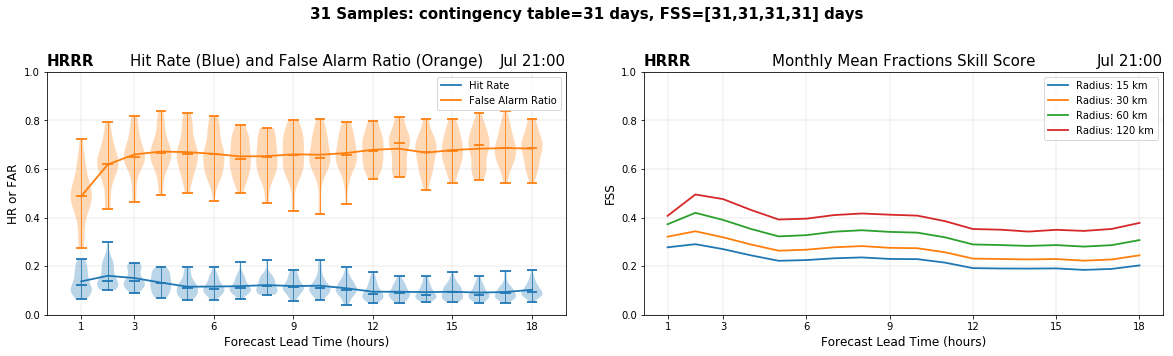

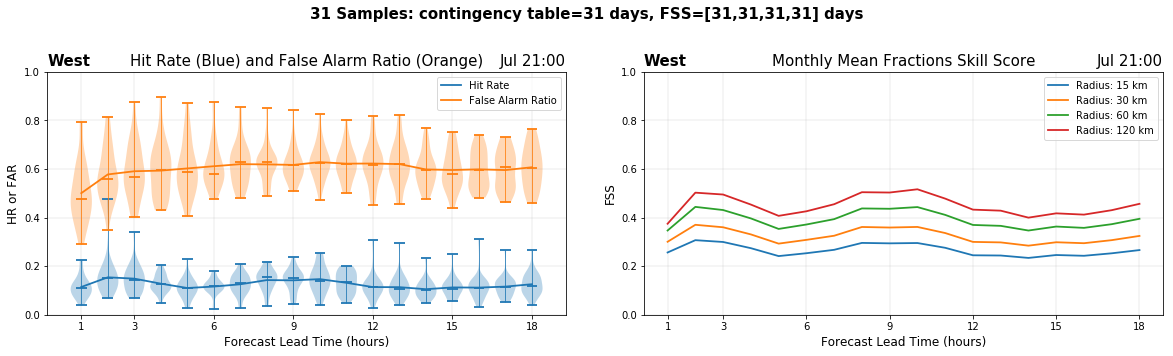

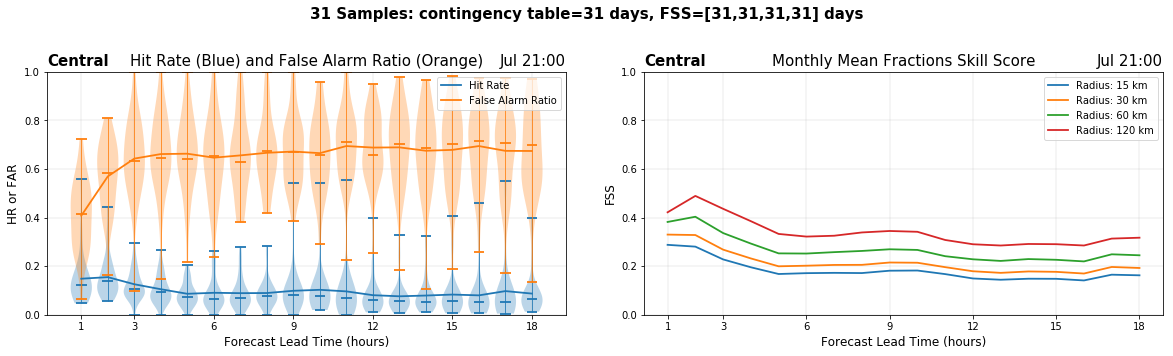

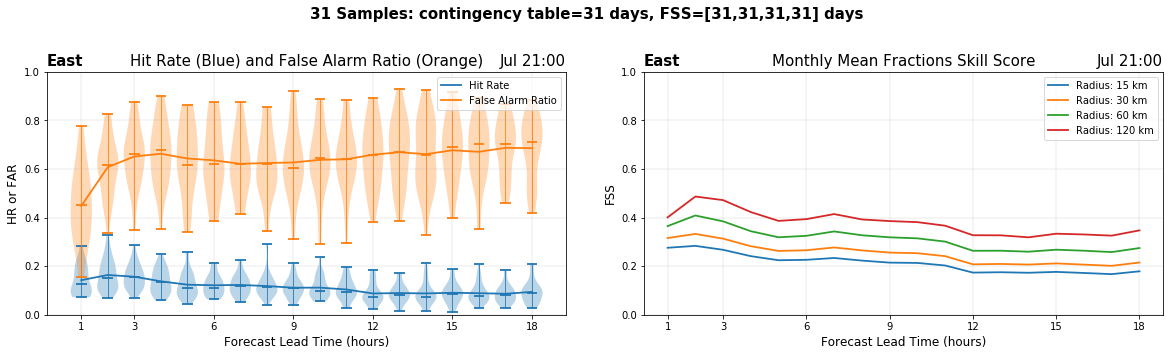

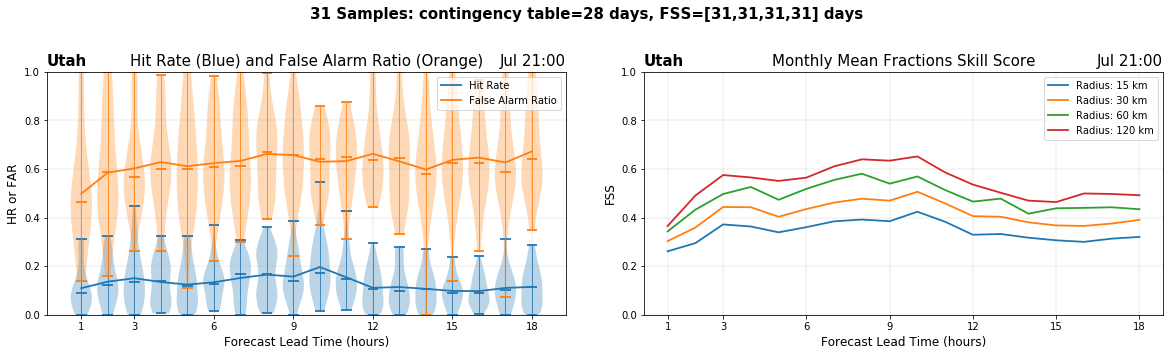

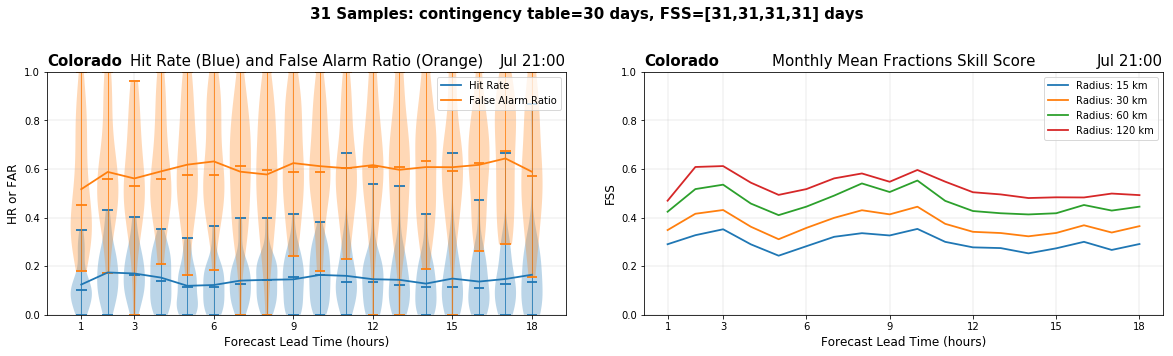

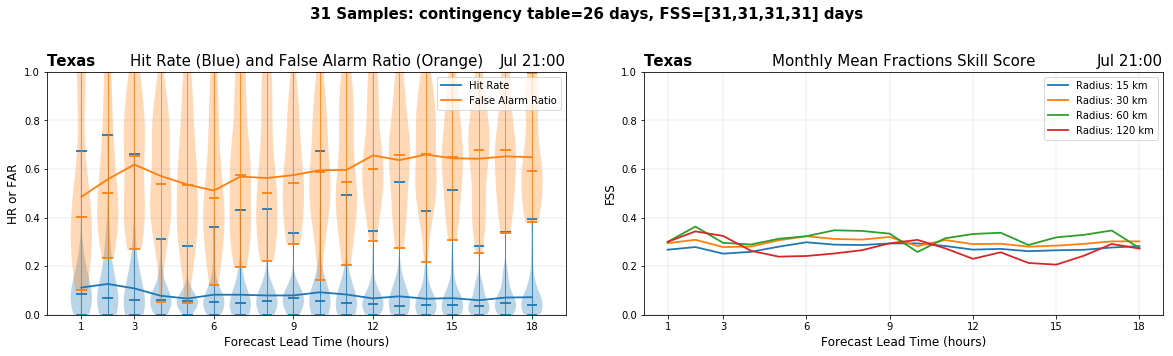

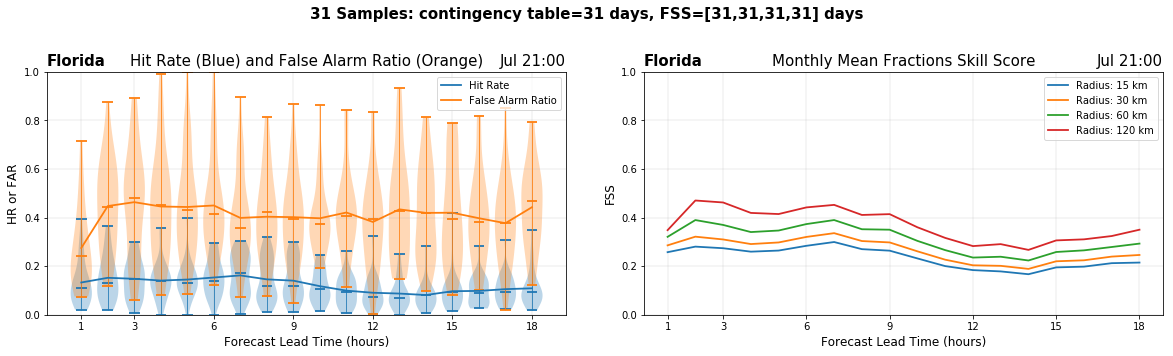

In [139]:
#radii = [5, 10, 20]
#MONTHS = range(5,11)
#HOUR = 0

radii = [5, 10, 20, 40]
MONTHS = range(5,11)
HOUR = 21

data_dict = get_contingency_table_by_hour(HOUR, MONTHS=MONTHS)
data_dict_FSS = [get_FSS_by_hour(HOUR, MONTHS=MONTHS, radius=r) for r in radii]

for DOMAIN in domains:
#for DOMAIN in ['Colorado', 'Texas', 'Utah', 'Florida']:
#for DOMAIN in ['Colorado']:
    
    for MONTH in MONTHS:

        # Get contingency Table data
        A = np.array([data_dict[DOMAIN][MONTH]['F%02d_A' % s] for s in range(1,19)])
        B = np.array([data_dict[DOMAIN][MONTH]['F%02d_B' % s] for s in range(1,19)])
        C = np.array([data_dict[DOMAIN][MONTH]['F%02d_C' % s] for s in range(1,19)])
        D = np.array([data_dict[DOMAIN][MONTH]['F%02d_D' % s] for s in range(1,19)])
        
        # How many days are in the sample (including nan values)
        samples = np.shape(A)[1]

        # Compute Hit Rate and False Alarm Ratio
        HR = hit_rate(A, B, C, D)
        FAR = false_alarm_ratio(A, B, C, D)

        HR_mean = np.nanmean(HR, axis=1)
        FAR_mean = np.nanmean(FAR, axis=1)
        
        # Remove nan values, which are days when no GLM lightning data were available.
        HR = np.array([i[~np.isnan(i)] for i in HR])
        FAR = np.array([i[~np.isnan(i)] for i in FAR])
        
        # Count number of day samples (excluding nan values)
        HR_days = np.shape(HR)[1]

        ## Make figure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

        plt.sca(ax1)
        
        v1 = plt.violinplot(np.transpose(HR), showmedians=True, widths=.8);
        v2 = plt.violinplot(np.transpose(FAR), showmedians=True, widths=.8);
        v1['cbars'].set_linewidth(.8);
        v2['cbars'].set_linewidth(.8);
        
        plt.plot(range(1,19), HR_mean, color='tab:blue', label='Hit Rate')
        plt.plot(range(1,19), FAR_mean, color='tab:orange', label='False Alarm Ratio')

        plt.title(DOMAIN, loc='left', fontweight='semibold')
        plt.title('Hit Rate (Blue) and False Alarm Ratio (Orange)')
        plt.title('%s %02d:00' % (datetime(2018, MONTH, 1).strftime('%b'), HOUR), loc='right')
        plt.grid()
        plt.xlabel('Forecast Lead Time (hours)')
        plt.ylabel('HR or FAR')
        plt.ylim([0,1])
        plt.xticks([1,3,6,9,12,15,18], [1,3,6,9,12,15,18]);
        plt.legend()
        
        plt.sca(ax2)
        
        for radius in radii:
            try:
                data_dict_FSS = get_FSS_by_hour(HOUR, MONTHS=MONTHS, radius=radius)
                FSS_rxx = np.array([data_dict_FSS[DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])
                FSS_rxx = np.array([i[~np.isnan(i)] for i in FSS_rxx])
                plt.plot(range(1,19), np.mean(FSS_rxx, axis=1), label='Radius: %s km' % (radius*3))
                FSS_rxx_days = np.shape(FSS_rxx)[1]
                if radius == 5:
                    day_sample_str = '%s' % FSS_rxx_days
                else:
                    day_sample_str += ',%s' % FSS_rxx_days
            except:
                print('%s no data with radius %s grid boxes' % (DOMAIN, radius))
            
        plt.legend()
        plt.title(DOMAIN, loc='left', fontweight='semibold')
        plt.title('Monthly Mean Fractions Skill Score')
        plt.title('%s %02d:00' % (datetime(2018, MONTH, 1).strftime('%b'), HOUR), loc='right')
        plt.grid()
        plt.xlabel('Forecast Lead Time (hours)')
        plt.ylabel('FSS')
        plt.ylim([0,1])
        plt.xticks([1,3,6,9,12,15,18], [1,3,6,9,12,15,18]);

        plt.suptitle('%s Samples: contingency table=%s days, FSS=[%s] days' % (samples, HR_days, day_sample_str))
        plt.subplots_adjust(top=.8)
        
        SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/GLM_and_HRRR/stats_by_month_hour/'
        if not os.path.exists(SAVEDIR):
                os.makedirs(SAVEDIR)
        plt.savefig(SAVEDIR+'m%02d_h%02d_%s' % (MONTH, HOUR, DOMAIN))

        # Only keep plots for July open
        if MONTH != 7:
            plt.close()

## Show the spread by day of month

#plt.figure(figsize=(10,5))
#v = plt.violinplot(HR, showmedians=True, widths=.8);
#v['cbars'].set_linewidth(.8);

#plt.figure(figsize=(10,5))
#v = plt.violinplot(FAR, showmedians=True, widths=.8);
#v['cbars'].set_linewidth(.8);


# Show the spread for each day of month

/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:125: RuntimeWarning: invalid value encountered in true_divide
  H = a/(a+c)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:152: RuntimeWarning: invalid value encountered in true_divide
  FAR = b/(a+b)
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice


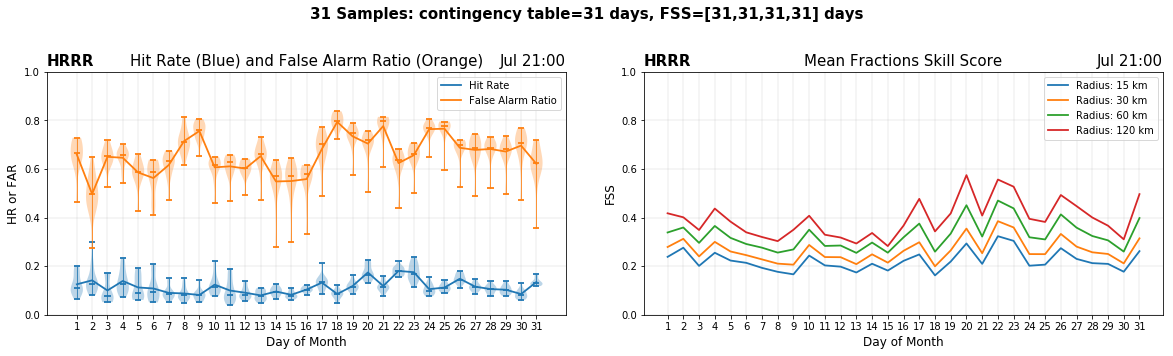

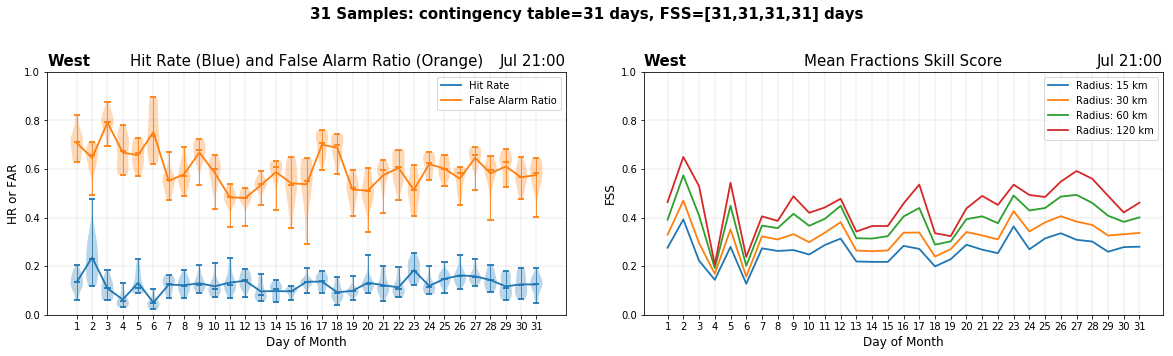

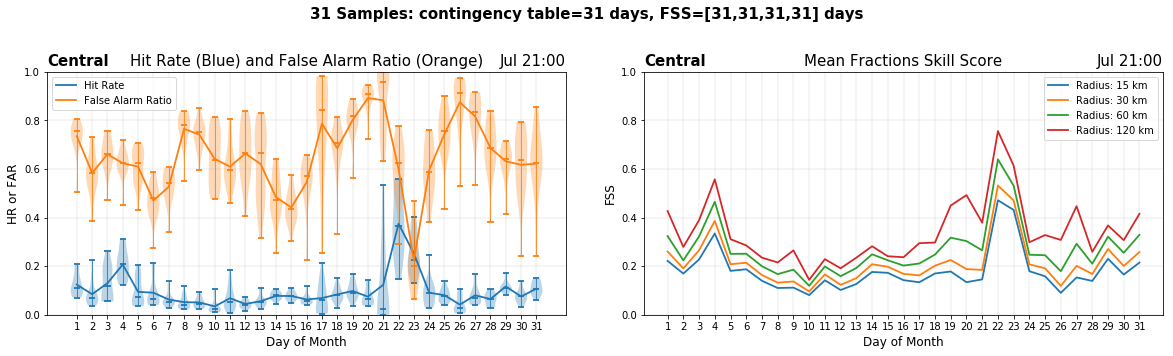

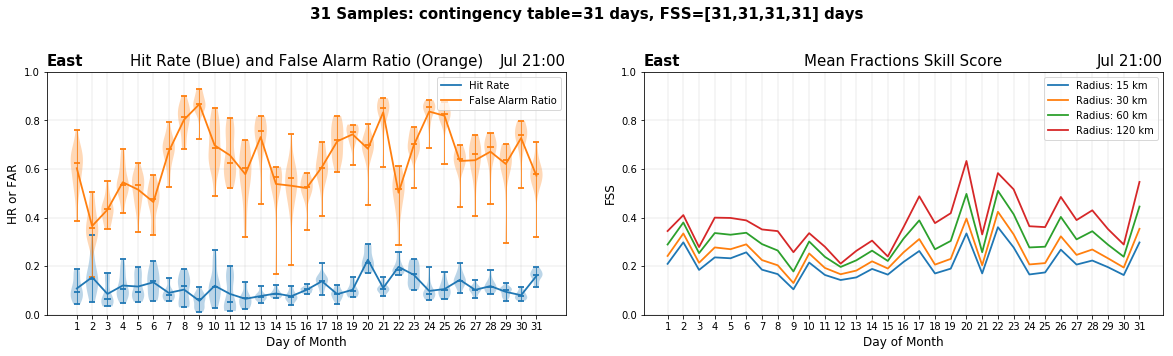

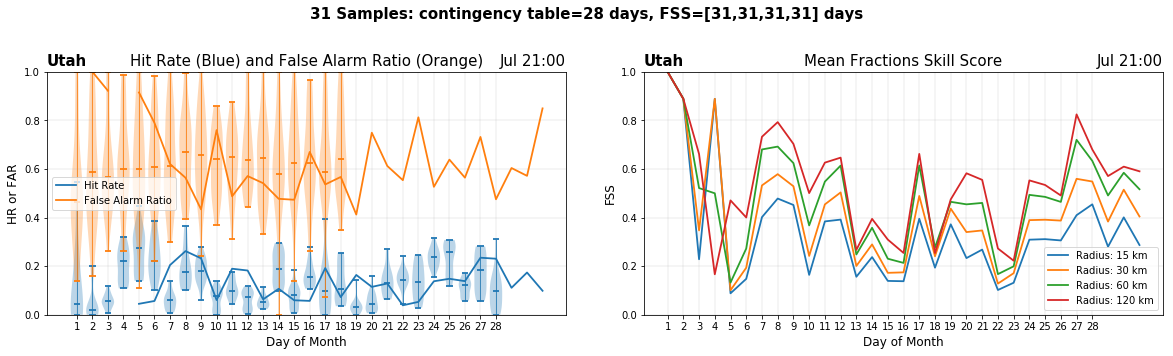

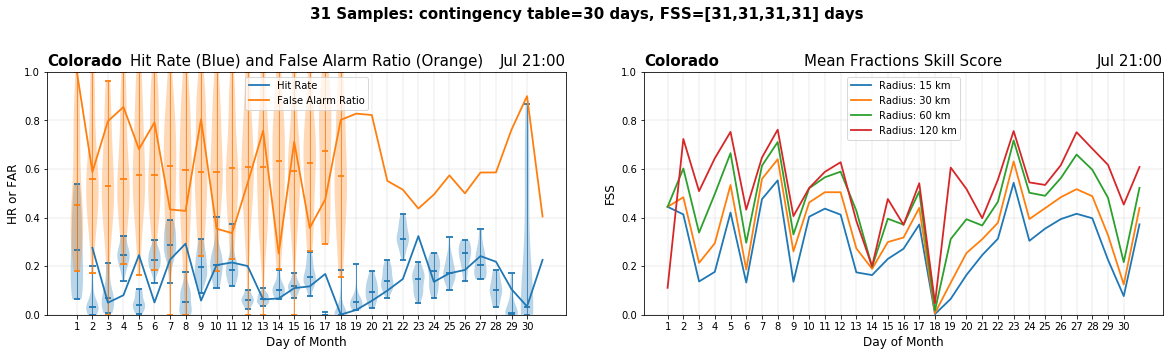

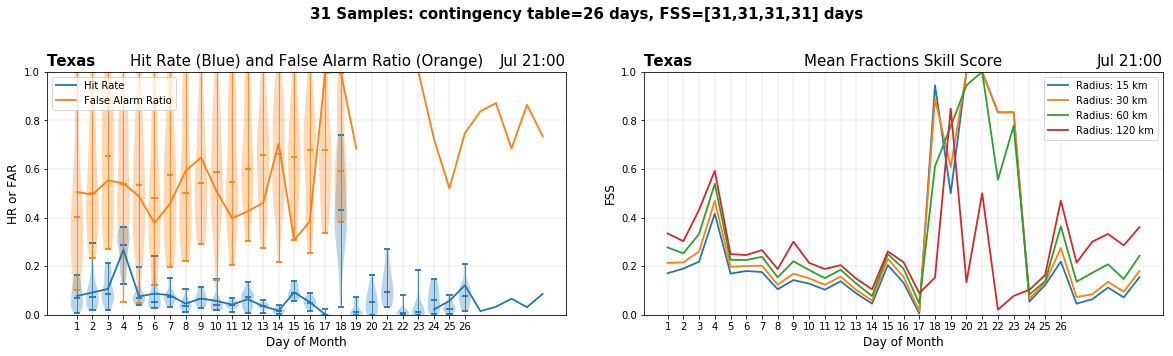

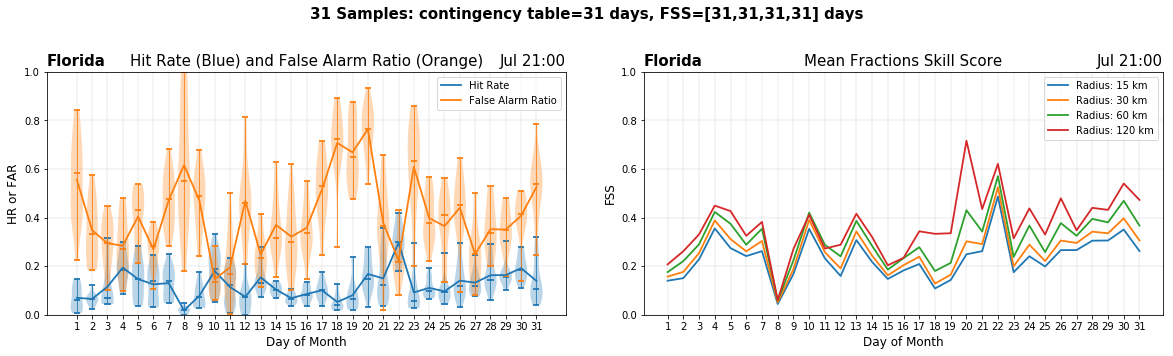

In [6]:
radii = [5, 10, 20, 40]
MONTHS = [7]
HOUR = 21

data_dict = get_contingency_table_by_hour(HOUR, MONTHS=MONTHS)
data_dict_FSS = [get_FSS_by_hour(HOUR, MONTHS=MONTHS, radius=r) for r in radii]

for DOMAIN in domains:
#for DOMAIN in ['Colorado', 'Texas', 'Utah', 'Florida']:
#for DOMAIN in ['Colorado']:
    
    for MONTH in MONTHS:

        # Get contingency Table data
        A = np.array([data_dict[DOMAIN][MONTH]['F%02d_A' % s] for s in range(1,19)])
        B = np.array([data_dict[DOMAIN][MONTH]['F%02d_B' % s] for s in range(1,19)])
        C = np.array([data_dict[DOMAIN][MONTH]['F%02d_C' % s] for s in range(1,19)])
        D = np.array([data_dict[DOMAIN][MONTH]['F%02d_D' % s] for s in range(1,19)])
        
        # How many days are in the sample (including nan values)
        samples = np.shape(A)[1]

        # Compute Hit Rate and False Alarm Ratio
        HR = hit_rate(A, B, C, D)
        FAR = false_alarm_ratio(A, B, C, D)

        HR_mean = np.nanmean(HR, axis=0)
        FAR_mean = np.nanmean(FAR, axis=0)
        
        # Remove nan values, which are days when no GLM lightning data were available.
        HR = np.array([i[~np.isnan(i)] for i in HR])
        FAR = np.array([i[~np.isnan(i)] for i in FAR])
        
        # Count number of day samples (excluding nan values)
        HR_days = np.shape(HR)[1]

        ## Make figure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

        plt.sca(ax1)
        
        v1 = plt.violinplot(HR, showmedians=True, widths=.8);
        v2 = plt.violinplot(FAR, showmedians=True, widths=.8);
        v1['cbars'].set_linewidth(.8);
        v2['cbars'].set_linewidth(.8);
        
        plt.plot(range(1, len(HR_mean)+1), HR_mean, color='tab:blue', label='Hit Rate')
        plt.plot(range(1, len(FAR_mean)+1), FAR_mean, color='tab:orange', label='False Alarm Ratio')

        plt.title(DOMAIN, loc='left', fontweight='semibold')
        plt.title('Hit Rate (Blue) and False Alarm Ratio (Orange)')
        plt.title('%s %02d:00' % (datetime(2018, MONTH, 1).strftime('%b'), HOUR), loc='right')
        plt.grid()
        plt.xlabel('Day of Month')
        plt.ylabel('HR or FAR')
        plt.ylim([0,1])
        plt.xticks(range(1, HR_days+1));
        plt.legend()
        
        plt.sca(ax2)
        
        for radius in radii:
            try:
                data_dict_FSS = get_FSS_by_hour(HOUR, MONTHS=MONTHS, radius=radius)
                FSS_rxx = np.array([data_dict_FSS[DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])
                FSS_rxx = np.array([i[~np.isnan(i)] for i in FSS_rxx])
                FSS_rxx_days = np.shape(FSS_rxx)[1]
                plt.plot(range(1, FSS_rxx_days+1), np.mean(FSS_rxx, axis=0), label='Radius: %s km' % (radius*3))
                
                if radius == 5:
                    day_sample_str = '%s' % FSS_rxx_days
                else:
                    day_sample_str += ',%s' % FSS_rxx_days
            except:
                print('%s no data with radius %s grid boxes' % (DOMAIN, radius))
            
        plt.legend()
        plt.title(DOMAIN, loc='left', fontweight='semibold')
        plt.title('Mean Fractions Skill Score')
        plt.title('%s %02d:00' % (datetime(2018, MONTH, 1).strftime('%b'), HOUR), loc='right')
        plt.grid()
        plt.xlabel('Day of Month')
        plt.ylabel('FSS')
        plt.ylim([0,1])
        plt.xticks(range(1, HR_days+1));

        plt.suptitle('%s Samples: contingency table=%s days, FSS=[%s] days' % (samples, HR_days, day_sample_str))
        plt.subplots_adjust(top=.8)
        
        SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/GLM_and_HRRR/stats_by_day_of_month/'
        if not os.path.exists(SAVEDIR):
                os.makedirs(SAVEDIR)
        plt.savefig(SAVEDIR+'m%02d_h%02d_%s' % (MONTH, HOUR, DOMAIN))

        # Only keep plots for July open
        if MONTH != 7:
            plt.close()

# FSS time series

In [99]:
def plot_FSS_ts(DOMAIN, HOUR, radius, MONTHS=range(5,11), save=True):
    """
    Inputs:
        DOMAIN - 'HRRR', 'West', 'Central', 'East', 'Utah', 'Colorado', 'Florida', 'Texas'
        HOUR   - number: between 0 and 23
        radius - number: 5, 10, 20, or 40
    """
    FSS_all = get_FSS_by_hour(HOUR, MONTHS=MONTHS, radius=radius)
    Table_all = get_contingency_table_by_hour(HOUR, MONTHS=MONTHS)
    #
    DATES_ts = []
    FSS_ts = {}
    A_ts = {}
    B_ts = {}
    C_ts = {}
    D_ts = {}
    POD_ts = {}
    FAR_ts = {}
    for M in MONTHS:
        D = FSS_all[DOMAIN][M]['DATE']
        for d in D:
            DATES_ts.append(datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))
        for i in range(1,19):
            if M == MONTHS[0]:
                FSS_ts['F%02d' % i] = FSS_all[DOMAIN][M]['F%02d_FSS' % i]
                A_ts['F%02d' % i] = Table_all[DOMAIN][M]['F%02d_A' % i]
                B_ts['F%02d' % i] = Table_all[DOMAIN][M]['F%02d_B' % i]
                C_ts['F%02d' % i] = Table_all[DOMAIN][M]['F%02d_C' % i]
                D_ts['F%02d' % i] = Table_all[DOMAIN][M]['F%02d_D' % i]
                POD_ts['F%02d' % i] = hit_rate(Table_all[DOMAIN][M]['F%02d_A' % i], Table_all[DOMAIN][M]['F%02d_B' % i], Table_all[DOMAIN][M]['F%02d_C' % i], Table_all[DOMAIN][M]['F%02d_D' % i])
                FAR_ts['F%02d' % i] = false_alarm_ratio(Table_all[DOMAIN][M]['F%02d_A' % i], Table_all[DOMAIN][M]['F%02d_B' % i], Table_all[DOMAIN][M]['F%02d_C' % i], Table_all[DOMAIN][M]['F%02d_D' % i])
            else:
                FSS_ts['F%02d' % i] = np.append(FSS_ts['F%02d' % i], FSS_all[DOMAIN][M]['F%02d_FSS' % i])
                A_ts['F%02d' % i] = np.append(A_ts['F%02d' % i], Table_all[DOMAIN][M]['F%02d_A' % i])
                B_ts['F%02d' % i] = np.append(B_ts['F%02d' % i], Table_all[DOMAIN][M]['F%02d_B' % i])
                C_ts['F%02d' % i] = np.append(C_ts['F%02d' % i], Table_all[DOMAIN][M]['F%02d_C' % i])
                D_ts['F%02d' % i] = np.append(D_ts['F%02d' % i], Table_all[DOMAIN][M]['F%02d_D' % i])
                POD_ts['F%02d' % i] = np.append(POD_ts['F%02d' % i], hit_rate(Table_all[DOMAIN][M]['F%02d_A' % i], Table_all[DOMAIN][M]['F%02d_B' % i], Table_all[DOMAIN][M]['F%02d_C' % i], Table_all[DOMAIN][M]['F%02d_D' % i]))
                FAR_ts['F%02d' % i] = np.append(FAR_ts['F%02d' % i], false_alarm_ratio(Table_all[DOMAIN][M]['F%02d_A' % i], Table_all[DOMAIN][M]['F%02d_B' % i], Table_all[DOMAIN][M]['F%02d_C' % i], Table_all[DOMAIN][M]['F%02d_D' % i]))
    #
    baseRate = base_rate(A_ts['F01'], B_ts['F01'], C_ts['F01'], D_ts['F01']) #Base rate is same for all FXX
    FSS_uniform = 0.5 + baseRate/2
    
    # FSS Spread
    fxxs = np.array([FSS_ts['F%02d' % f] for f in range(1,19)])
    max_fxx = np.nanmax(fxxs, axis=0)
    min_fxx = np.nanmin(fxxs, axis=0)
    mean_fxx = np.nanmean(fxxs, axis=0)
    std_fxx = np.std(fxxs, axis=0, ddof=1)
    
    # POD Spread
    POD_fxxs = np.array([POD_ts['F%02d' % f] for f in range(1,19)])
    POD_max_fxx = np.nanmax(POD_fxxs, axis=0)
    POD_min_fxx = np.nanmin(POD_fxxs, axis=0)
    POD_mean_fxx = np.nanmean(POD_fxxs, axis=0)
    POD_std_fxx = np.std(POD_fxxs, axis=0, ddof=1)
    
    # FAR Spread
    FAR_fxxs = np.array([FAR_ts['F%02d' % f] for f in range(1,19)])
    FAR_max_fxx = np.nanmax(FAR_fxxs, axis=0)
    FAR_min_fxx = np.nanmin(FAR_fxxs, axis=0)
    FAR_mean_fxx = np.nanmean(FAR_fxxs, axis=0)
    FAR_std_fxx = np.std(FAR_fxxs, axis=0, ddof=1)
    #
    #
    plt.figure()
    #
    for f in [1, 6, 12, 18]:
        plt.plot(DATES_ts, FSS_ts['F%02d' % f], label='F%02d' % f, linewidth=1)
    #
    #plt.fill_between(DATES_ts, min_fxx, max_fxx, color='peachpuff', alpha=.5)
    #
    plt.plot(DATES_ts, FSS_uniform, linestyle='--', color='grey', label='$FSS_{uniform}$', zorder=0)
    #
    plt.title('Domain: %s'% DOMAIN, loc='left')
    plt.title('Hour: %s:00 UTC' % HOUR)
    radius_km = radius*3
    plt.title('Radius: %s km' % radius_km, loc='right')
    plt.ylabel('FSS')
    plt.ylim([0,1])
    plt.xlim([datetime(DATES_ts[0].year, DATES_ts[0].month, DATES_ts[0].day), datetime(DATES_ts[-1].year, DATES_ts[-1].month, DATES_ts[-1].day)+timedelta(days=1)])
    plt.legend(loc=1)
    plt.grid()
    #
    plt.axvline(datetime(2018, 7, 12, 12), linestyle='--', color='k', zorder=0)
    plt.text(datetime(2018, 6, 24, 0), .9, 'HRRRv2')
    plt.text(datetime(2018, 7, 14, 6), .9, 'HRRRv3')
    #
    formatter = DateFormatter('%b-%d\n%Y')
    plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
    plt.gcf().axes[0].xaxis.set_major_locator(mdates.DayLocator([1]))
    #
    if save:
        plt.savefig('./figs/FXX_timeseries_%s_h%s_r%skm' % (DOMAIN, HOUR, radius_km))

    ### FSS Spread TimeSeries
    plt.figure()
    plt.plot(DATES_ts, std_fxx)
    plt.title('Domain: %s'% DOMAIN, loc='left')
    plt.title('Hour: %s:00 UTC' % HOUR)
    radius_km = radius*3
    plt.title('Radius: %s km' % radius_km, loc='right')
    plt.ylabel('FSS spread between leadtimes')
    plt.ylim([0,.3])
    plt.xlim([datetime(DATES_ts[0].year, DATES_ts[0].month, DATES_ts[0].day), datetime(DATES_ts[-1].year, DATES_ts[-1].month, DATES_ts[-1].day)+timedelta(days=1)])
    plt.legend(loc=1)
    plt.grid()
    #
    plt.axvline(datetime(2018, 7, 12, 12), linestyle='--', color='k', zorder=0)
    plt.text(datetime(2018, 6, 24, 0), .26, 'HRRRv2')
    plt.text(datetime(2018, 7, 14, 6), .26, 'HRRRv3')
    #
    formatter = DateFormatter('%b-%d\n%Y')
    plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
    plt.gcf().axes[0].xaxis.set_major_locator(mdates.DayLocator([1]))
    
    if save:
        plt.savefig('./figs/FXX_timeseries_%s_h%s_r%skm_std' % (DOMAIN, HOUR, radius_km))
        
    
    ### POD and FAR TimeSeries
    plt.figure()
    for f in [1, 18]:
        POD = hit_rate(A_ts['F%02d' % f], B_ts['F%02d' % f], C_ts['F%02d' % f], D_ts['F%02d' % f])
        FAR = false_alarm_ratio(A_ts['F%02d' % f], B_ts['F%02d' % f], C_ts['F%02d' % f], D_ts['F%02d' % f])
        plt.plot(DATES_ts, POD, label='POD F%02d' % f)
        plt.plot(DATES_ts, FAR, label='FAR F%02d' % f)
    plt.title('Domain: %s'% DOMAIN, loc='left')
    plt.title('Hour: %s:00 UTC' % HOUR)
    radius_km = radius*3
    plt.ylabel('POD and FAR')
    plt.ylim([0,1])
    plt.xlim([datetime(DATES_ts[0].year, DATES_ts[0].month, DATES_ts[0].day), datetime(DATES_ts[-1].year, DATES_ts[-1].month, DATES_ts[-1].day)+timedelta(days=1)])
    plt.legend(loc=1)
    plt.grid()
    #
    plt.axvline(datetime(2018, 7, 12, 12), linestyle='--', color='k', zorder=0)
    plt.text(datetime(2018, 6, 24, 0), .9, 'HRRRv2')
    plt.text(datetime(2018, 7, 14, 6), .9, 'HRRRv3')
    #
    formatter = DateFormatter('%b-%d\n%Y')
    plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
    plt.gcf().axes[0].xaxis.set_major_locator(mdates.DayLocator([1]))
    
    if save:
        plt.savefig('./figs/FXX_timeseries_%s_h%s_r%skm_POD-FAR' % (DOMAIN, HOUR, radius_km))
        
        
    ## POD/FAR Spread TimeSeries
    plt.figure()
    plt.plot(DATES_ts, POD_std_fxx, label='POD Spread')
    plt.plot(DATES_ts, FAR_std_fxx, label='FAR Spread')
    plt.title('Domain: %s'% DOMAIN, loc='left')
    plt.title('Hour: %s:00 UTC' % HOUR)
    radius_km = radius*3
    plt.title('Radius: %s km' % radius_km, loc='right')
    plt.ylabel('POD/FSS spread between leadtimes')
    plt.ylim([0,.3])
    plt.xlim([datetime(DATES_ts[0].year, DATES_ts[0].month, DATES_ts[0].day), datetime(DATES_ts[-1].year, DATES_ts[-1].month, DATES_ts[-1].day)+timedelta(days=1)])
    plt.legend(loc=1)
    plt.grid()
    #
    plt.axvline(datetime(2018, 7, 12, 12), linestyle='--', color='k', zorder=0)
    plt.text(datetime(2018, 6, 24, 0), .26, 'HRRRv2')
    plt.text(datetime(2018, 7, 14, 6), .26, 'HRRRv3')
    #
    formatter = DateFormatter('%b-%d\n%Y')
    plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
    plt.gcf().axes[0].xaxis.set_major_locator(mdates.DayLocator([1]))
    
    if save:
        plt.savefig('./figs/FXX_timeseries_%s_h%s_r%skm_POD-FAR_std' % (DOMAIN, HOUR, radius_km))

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: All-NaN slice encountered
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: All-NaN slice encountered
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: All-NaN slice encountered
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: All-NaN slice encountered
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: All-NaN s

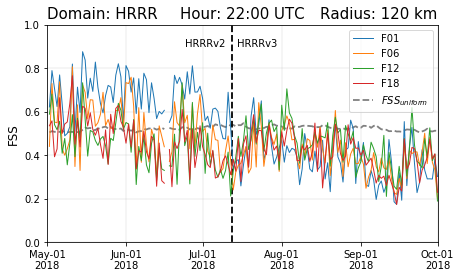

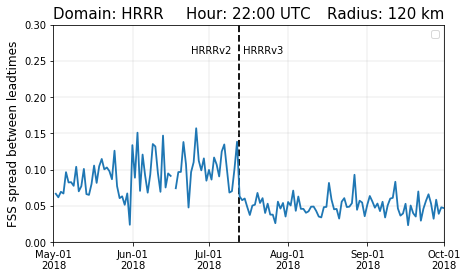

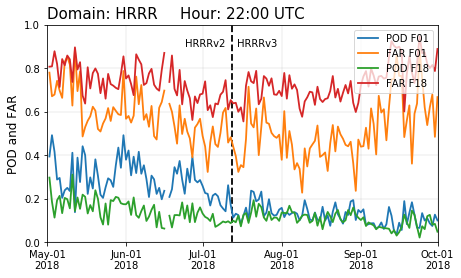

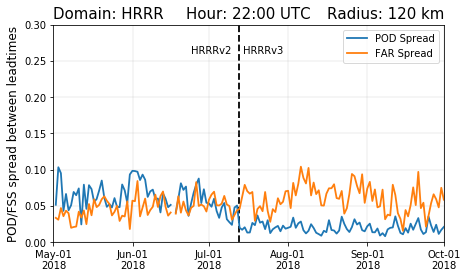

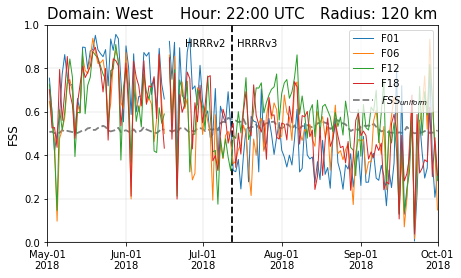

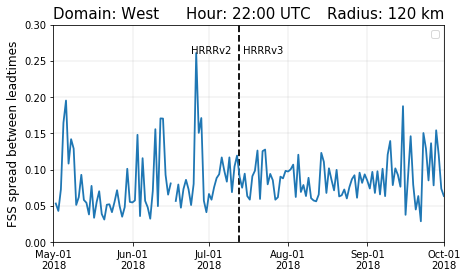

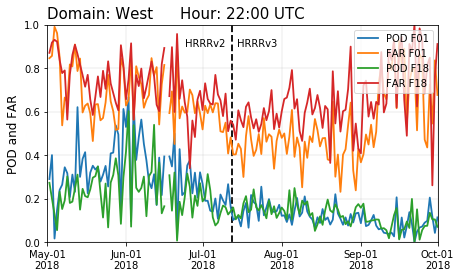

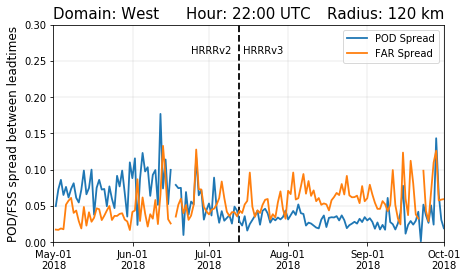

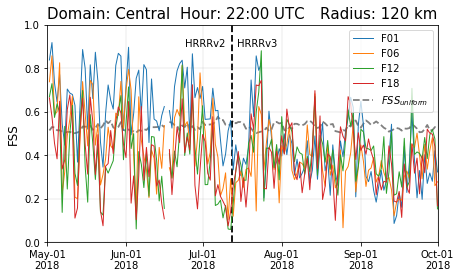

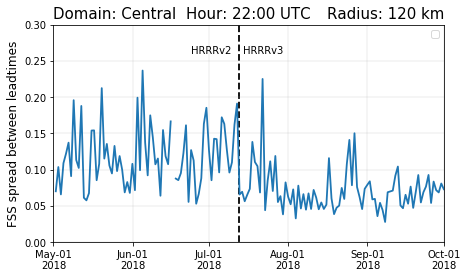

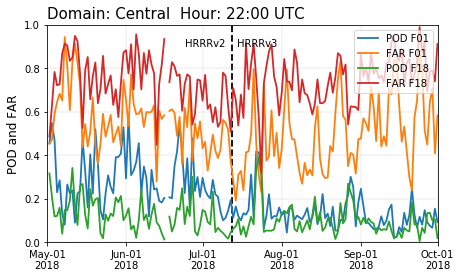

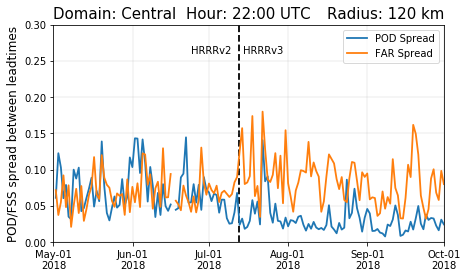

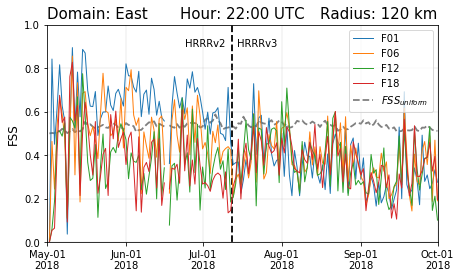

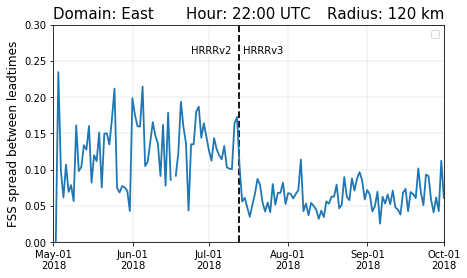

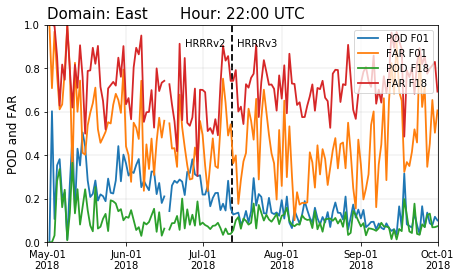

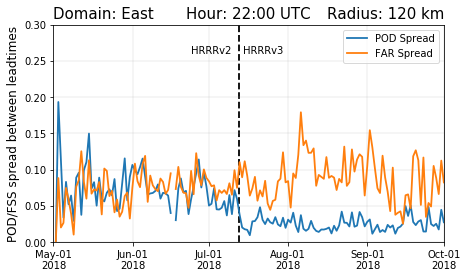

In [100]:
for DOM in ['HRRR', 'West', 'Central','East']:
#for DOM in ['HRRR']:
    plot_FSS_ts(DOM, HOUR=22, radius=40, MONTHS=range(5,10), save=True)
    #plot_FSS_ts(DOM, HOUR=22, radius=20, MONTHS=range(5,10), save=True)